## The 'cocktail party nightmare' is a well known problem in bat acoustics[Ulanovsky & Moss ]. While it remains conceptually puzzling, bats in the field are known to echolocate in groups on a regular basis. Psychophysically, the auditory challenge of the cocktail party nightmare is to perceive echoes in the midst of many maskers. 

## This notebook will try to quantify the probability a bat can hear at least *N* echoes in an interpulse interval in the midst of conspecific masker calls. We will first calculate the probability of hearing echoes in the worst case scenario, where every call is a loud potential masker, and proceed to include known psychophysical and acoustic phenomena to observe the 'releasing' effects they have. 

### Temporal masking : 
### Echolocating bats emit calls that are very loud (120 dB SPL at 10cm, re 20$\mu$Pa) at rates of 10 Hz and above. When foraging solitarily bats hear faint returning echoes and are able to navigate even in dense cluttered conditions.  
### However, in the presence of other loud sounds, their ability to perceive these returning echoes may be reduced because of auditory masking. Auditory masking in general, is when a preceding sound or masker affects the perception of a target sound by raising the required threshold. In the cocktail party nightmare, these maskers are loud conspecific calls. Temporal masking is one form of auditory masking, where the temporal proximity of the masker increases the threshold intensity to perceive the target echo. This means that even though the masker does not overlap directly with the echo, it still affects the perception of the echo. When the masker arrives before the target, it is called 'forward masking' , and when it arrives after the target it is called 'backward masking'. Studies of forward and backward masking in bats [REF[ show similar trends as in humans - in that a forward masker affects the perception of a target over much longer time scales than a backward masker [REF]. The fact that these timescales range upto a tens of milliseconds means that the span over which auditory masking could occur is longer and exacerbates the cocktail party nightmare. 

### Mechanisms providing release from temporal masking :

* ### 1) Spatial unmasking/ release from masking :
### Spatial unmasking is the capability of the auditory system to overcome masking when two overlapping sounds arrive from different directions. The auditory system is thought to rely on the inter-aural time and level differences to tell apart the two sounds [REF]. This means that the level of masking is reduced in comparison to a collocated target-masker scenario. In bats, spatial release in a backward masking scenario has been studied by Suemer et al. 2009 and they have found complete release from masking of sounds with greater that 23 degrees separation in *Eptesicus fuscus*. Spatial unmasking may provide an important source of release from temporal masking as the echoes that a bat is focusing will typically be arriving from a different set of angles than the maskers - which are arriving from the conspecifics distributed around the bat in space. 

* ### 2) Call directionality : 
### All forms of sound sources have an inherent directionality to them due to the interaction of the size and shape of the producing body and frequency of the sounds being emitted. It is also the case with bats, that are also known to alter the directionality of their calls depending on the spatial volume they wish to ensonify [REF]. With bats, it is known that the highest intensity of a call is on-axis, and it then falls off as one moves more and more off-axis. This has been previously modeled by the baffled piston [REF], and the directionality has also been measured empirically [Giuggioli et al. 2015]. Giuggioli et al. 2015 found a drop of 14 dB from the on-axis to behind the bat for *Myotis daubentonii* in the field. The cocktail party nightmare is a conceptual problem as it assumes that all conspecific calls are loud maskers. When one considers that a focal bat is receiving calls from conspecifics around it - it becomes obvious that most of these incoming calls will be *off-axis* calls, which means that they may actually be much fainter than we presume them to be. 

* ### 3) Spatial arrangement of bat aggregations : 
### Even in very large groups of bats, eg. *Tadarida brasiliensis*, every bat flies with a particular distance to its neighbour, and has only a limited number of first-order neighbours. These neighbours are important because they emit the loudest calls. As the group size increases, the number of calls a focal bat receives increases - but more and more of these calls will be from 2nd,3rd or higher order neighbours. Calls emitted from distant neighbours will have fainter levels than those from the 1st order neighbours. This is becase the intensity of sound falls off logarithmically with distance, as described by the equation:
### $Received\ Level = Source\ Level_{1m} - 20log_{10}\frac{conspecific\ distance}{1}$


### This work will explore how the contribution of each factor may increase the bats' ability to perceive echoes in the cocktail party nightmare. The index of perception we will use is the probability that a bat hears at least $\geq $ 3 echoes in an interpulse interval. We shall begin by simulating a scenario where all calls are high intensity maskers arriving collocated with the echo. 


# Methods/Simulations : 

## Basic Simulation Algorithm : 
### The unit of all simulations is a single inter-pulse interval (IPI), which is a span of time discretised into 0.1 millisecond chunks. To simulate the perception *N* conspecific calls, *N* blocks of time corresponding to the echo/call duration are randomly assigned in the IPI. From the given input range, *N* angles of arrival and received levels are assigned to these calls. Five echoes are also placed equally spaced between the start and half the duration of the IPI. Multiple echoes are used to mimic the naturalistic echo-acoustic flow that bats perceive while scanning their environment. The common set of parameters used to define the IPI were :
* ### Simulation time resolution : 0.1 milliseconds
* ### Call duration : 3 milliseconds
* ### Inter pulse interval : 100 milliseconds 
* ### Echoes spaced evenly between 0 and 50 milliseconds, considering a echo-processing time of 50 milliseconds[REFS]
* ### Call densities (calls per IPI) simulated : 1, 35 in steps of 5. 

## Criteria for echo perception :
* ### For an echo to be heard, the difference in the intensities,$\Delta dB\ SPL$, must be greater or equal to the thresholds from the input temporal masking function. The temporal masking function is defined as a set of values describing the auditory capabilities of bats under various collocated masker-echo regimes of forward, backward and simultaneous masking. The common dataset that will be used in these simulations is derived from Sümer et al. 2009 and Siewert et al. 200X?. The use of a single temporal masking function presumes that echo-masker $\Delta dB\ SPL$ values remain the same irrespective of the exact intensity of the echo or masker. 

## Spatial unmasking and echo perception : 
* ### When spatial unmasking is implemented in the focal bats' perception, then there is a reduction in $\Delta dB\ SPL$, which means the bat can hear echoes that are softer than expected if target-masker were collocated. The  reduction in echo-masker level differences is defined by the 'spatial unmasking function'. This dataset consists of a set of angle-of-arrival differences between echo and masker, and the level of release this provides. The dataset is directly taken from that of Sümer et al. 2009 (a backward masking experiment) and is applied symmetrically to forward, simultaneous and backward masking. The use of a single spatial unmasking function presumes that 1) the spatial release gained from a difference in echo-masker angle of arrival is the same whether it is forward, simultaneous or backward masking and 2) that the amount of release is independent of the actual level of the echo/masker. 

## Call directionality :
* ### When call directionality is not implemented, the received call intensities are simulated  by a randomly picking integer values of received values that lie within a given minimum and maximum range. When call directionality is implemented, the simulated received call intensity is altered by a reduction of $\leq 0 $ dB due to the call directionality factor. The call directionality factor is calculated after Giuggioli et al. 2015. A first-order assumption is made that all bats are flying parallel to each other and are calling in the same direction, which allows calculation of emission angle from angle of reception of the focal bat. 

## Spatial arrangement in the bat aggregation :  (not yet implemented)
* ### Bats are assumed to be placed in the centres of regular hexagons in a 2D tessellated array. Each bat thus has 6 immediate neighbours, 12 neighbours on the 'second' ring around the immediate neighbours, 18 'third ring' neighbours and so on. Given it is a symmetric and regular hexagonal array, we approximate this to the case where conspecifics are located on multiple concentric circles of increasing radii centred on the focal bat. When there are *N* $\leq6$ calls to be simulated, all calls are considered to  arrive from the pre-defined ring-radius $R_{1,2,3,..}$. When there are *N* $>6$ calls to be simulated - calls are first assigned to the inner ring, and then only assigned to progressively outer rings. 

## Scenario 1) only Temporal Masking :  Collocated Maskers
### We simulate five very loud echoes (60-82 dB SPL re 20$\mu$Pa) in the IPI, the equivalent of a bat ensonifying conspecifics at distances of 0.5-1 meter.  All maskers are collocated with the incoming echoes, and thus there is no spatial release from masking. 

## Scenario 2) Call Directionality :
### Using an asymmetery parameter of 7.3 from Giuggioli et al 2015 - call directionality is implemented, which contributes a maximum of 14.5 dB drop from the on-axis level.

## Scenario 3) Spatial Unmasking : 
### The angle of arrival of the maskers are considered. 

## Scenario 4) : Spatial Unmasking *and* Call Directionality 

# The Cocktail Party at 10 Hz : 
## With the previous simulations - we calculate the underlying probability of $\geq 3 $ echoes being heard. When the bat echolocates at 10 Hz - how many inter pulse intervals does it actually get a good 'glimpse' ? This is given by 10 Bernoilli trials, and the probabilities for each number of interpulse intervals with glimpses can be got with the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution#Probability_mass_function]). We use the probabilities for 20 calls per inter-pulse interval, which is similar to those bats may have experienced in [Amichai et al. 2016](http://rspb.royalsocietypublishing.org/content/282/1821/20152064). 20 calls of 3milliseconds corresponds to 60milliseconds of jamming signal in a 100 millisecond interpulse interval , which is a maximum possible jamming at ~60 % duty cycle. 


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from the_cocktail_party_nightmare_MC import calc_num_times
Pgeq3 = pd.read_csv('results/pgeq3_2018-01-10-20-37-19_10000replicates.csv')
print(Pgeq3)

callrate = 10 # in Hz
prob_geq3echoes = Pgeq3.iloc[4,:-1] # probability of hearing greater or equal to 3 echoes

prob_occurence = [ calc_num_times(callrate,each_prob) for each_prob in  prob_geq3echoes]
treatment_names = {'only_TM':'Only Temporal Masking',
            'with_CallDirn':'Call Directionality',
            'with_SUm':'Spatial Unmasking',
            'with_SUm_CallDirn':'Call Directionality and Spatial Unmasking'}  


   only_TM  with_SUm  with_CallDirn  with_SUm_CallDirn  call_density
0   0.9670    0.9996         0.9873             1.0000             1
1   0.4596    0.9832         0.6798             0.9979             5
2   0.1214    0.9367         0.2981             0.9885            10
3   0.0310    0.8621         0.1187             0.9709            15
4   0.0064    0.7854         0.0455             0.9464            20
5   0.0022    0.7083         0.0206             0.9127            25
6   0.0004    0.6386         0.0079             0.8806            30


# Results :
## All scenarios of the cocktail party nightmare :

### On putting together all four scenarios, we see that spatial unmasking provides major release from masking in the cocktail party nightmare. The combination of call directionality and spatial unmasking provide very strong release - and allow the bat to perceive its surroundings fairly well.
![pgeq3](plots/pgeq3_2018-01-10-20-37-19_10000replicates.png)



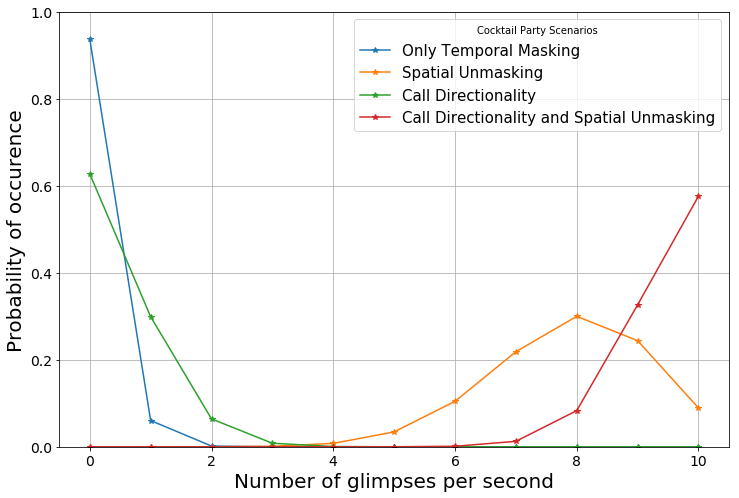

In [32]:
plt.figure(1,figsize=(12,8))
for i,scenario in enumerate(prob_occurence):
    plt.plot(scenario['num_times'],scenario['probability'],'*-',
                                            label=treatment_names[ Pgeq3.columns[i] ] )
plt.ylim(0,1);plt.xlabel('Number of glimpses per second',fontsize=20)
plt.ylabel('Probability of occurence',fontsize=20);plt.grid()
plt.xticks(fontsize=14);plt.yticks(fontsize=14)
plt.legend(title='Cocktail Party Scenarios',fontsize=15) 
plt.show()


## The cocktail party at 10 Hz : 
### The strong effect of spatial unmasking is still seen here. With spatial unmasking, a bat will experience *at least* 4 glimpses per second, and when spatial unmasking is combined with call directionality - a bat will experience *at least* 6 glimpses per second.